# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [43]:
#Load up the algorithms we are going to need.
import numpy as np
from matplotlib import pyplot as plt
import emcee
from scipy import stats
%matplotlib inline
np.random.seed(42)

# Problem 2

In [36]:
# Set up the givens for the problem
mu = 1.0
sigma = 0.2 

# draw the three samples for N = 3 and 10 and set the random state
sample3 = norm(mu,sigma).rvs(3,random_state=42)
sample10 = norm(mu,sigma).rvs(10,random_state=42)
sample10 = sample10[sample10>1.1]

print (sample3)
print (sample10)

[1.09934283 0.97234714 1.12953771]
[1.12953771 1.30460597 1.31584256 1.15348695 1.10851201]


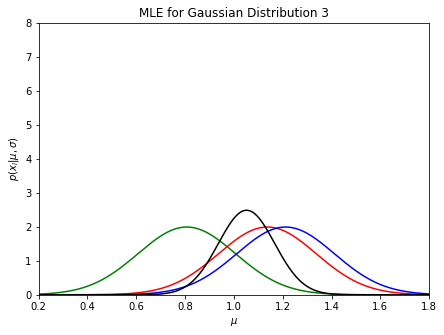

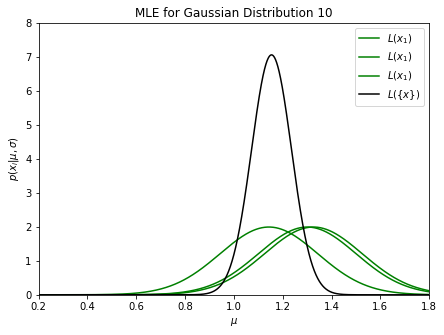

In [45]:
# Set up the Grid
muGrid = None
muGrid = np.linspace(0,2,10000)
# Calculate L1, L2, and L3 for N=3
L1 = norm.pdf(muGrid,loc=sample3[0], scale=sigma)
L2 = norm.pdf(muGrid,loc=sample3[1], scale=sigma)
L3 = norm.pdf(muGrid,loc=sample3[2], scale=sigma)
L = L1*L2*L3 

# Plot N = 3 soltions 
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution 3')


# Make an array for N = 10 only taking the samples > 1.1
L10 = []
for i in np.arange(len(sample10)):
    L10.append( norm.pdf(muGrid,loc=sample10[i], scale=sigma) )

# Loop through to find L
for i in np.arange(len(sample10)):
    L *= L10[i]

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
for i in np.arange(len(sample10)):
    plt.plot(muGrid, L10[i], Ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution 10')
plt.legend()

## Problem 3

In [72]:
# p(clear tomorrow |  cloudy today) = 0.5
# p(cloudy tomorrow | cloudy today) = 0.5
# p(cloudytomorrow |  clear today) = 0.1
# p(cleartomorrow |   clear today) = 0.9.

# cloudy = 0 
# clear = 1

# Define the Possible States
states = ["Sunny","Cloudy"]

# Possible Sequences of States
transitionName = [["SuSu","SuCl"],["ClCl","ClSu"]]

# Probabilities Matrix for Transition of States
transitionMatrix = [[0.9,0.1],[0.5,0.5]]


# Check that probabilities add to 1. If not, raise ValueError
if sum(transitionMatrix[0])+sum(transitionMatrix[1]) != 2:
    print("Error!!!! Probabilities MUST ADD TO 1. Check transition matrix!!")
    raise ValueError("Probabilities MUST ADD TO 1")



In [97]:
import random
def weatherForecast(days):
    # There is no reason to start from one state or another, let's just
    # pick one randomly
    weatherList = []
    weatherToday = random.choice(states)
    weatherList.append(weatherToday)
    i = 0
    print("Starting weather: ",weatherToday)
    while i < days:
        if weatherToday == "Sunny":
            #numpy.random.choice(a, size=None, replace=True, p=None)
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SuSu":
                weatherList.append(weatherToday)
                pass
            else:
                weatherToday = "Cloudy"
                weatherList.append(weatherToday)
        elif weatherToday == "Cloudy":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "ClCl":
                weatherList.append(weatherToday)
                pass
            else:
                weatherToday = "Sunny"
                weatherList.append(weatherToday)
        i += 1  
    return weatherList


In [128]:
N = 10000
list_weather = weatherForecast(N)

Starting weather:  Sunny


9901


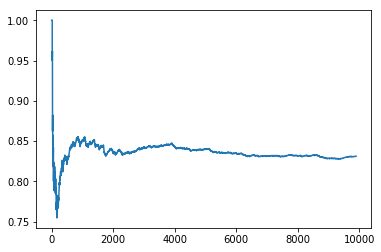

In [136]:
Cl=0
Su=0
days=1
probSu = []

modified_weather = list_weather[100:]
day_list = np.arange(0,len(modified_weather))

for day in modified_weather:
    if day =="Sunny":
        Su += 1.
    probSu.append(Su/days)
    days+=1
    
print(len(probSu))

plt.plot(day_list,probSu)

(array([9.750e+02, 1.645e+03, 3.940e+02, 5.230e+02, 7.610e+02, 4.060e+02,
        2.890e+02, 5.450e+02, 5.900e+02, 4.670e+02, 3.980e+02, 4.580e+02,
        3.920e+02, 2.150e+02, 1.180e+02, 8.300e+01, 9.400e+01, 8.900e+01,
        3.800e+01, 4.700e+01, 3.700e+01, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00]),
 array([0.83  , 0.8312, 0.8324, 0.8336, 0.8348, 0.836 , 0.8372, 0.8384,
        0.8396, 0.8408, 0.842 , 0.8432, 0.8444, 0.8456, 0.8468, 0.848 ,
        0.8492, 0.8504, 0.8516, 0.8528, 0.854 , 0.8552, 0.8564, 0.8576,
        0.8588, 0.86  ]),
 <a list of 25 Patch objects>)

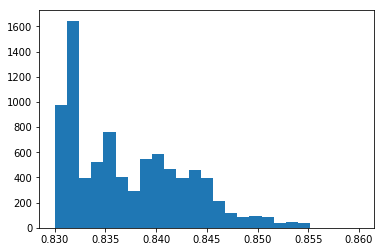

In [141]:
plt.hist(probSu, bins=25, range = [0.83,0.86])